# Import headers

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

# {Inputs}

In [32]:
ticker = 'adbe'

eps_ttm             = 6.01                 # {yahoo finance}
hist_5y_growth_rate = 45.88                # {yahoo finance}
pred_5y_growth_rate = 19.25                # {yahoo finance}
my_est_growth_rate  = 20                # your own prediction
pe_ratio_current    = 58.56                # {msn money}
pe_ratio_5y_high    = 74.25                # {msn money}
pe_ratio_5y_low     = 43.03                # {msn money}

fv_morning_star     = 330                  # {morning star}

pe_ratio_5y_avg    = (pe_ratio_5y_high + pe_ratio_5y_low) / 2
pe_ratio_rule_1    = 2*hist_5y_growth_rate # Rule #1
est_pe_ratio       = min(pe_ratio_rule_1, pe_ratio_5y_avg)

string_len = 31
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))
print('{:{prec}}: {}'.format('Past 5yrs avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('PE from Historical growth rate', pe_ratio_rule_1, prec=string_len))
print('{:{prec}}: {} {}\n'.format('Estimated PE', est_pe_ratio, ' (Used for predicting fair value)', prec=string_len))

print('{:{prec}}: {}'.format('Historical growth rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Analysts predicted growth rate', 0, prec=string_len))
print('{:{prec}}: {}'.format('Custom predicted growth rate', my_est_growth_rate, prec=string_len))

Current PE                     : 58.56

Past 5yrs avg PE               : 58.64
PE from Historical growth rate : 91.76
Estimated PE                   : 58.64  (Used for predicting fair value)

Historical growth rate         : 45.88
Analysts predicted growth rate : 0
Custom predicted growth rate   : 20


# Estimate future intrinsic value 
**based on last 5 years avg pe ratio and estimated future eps**

In [3]:
# estimate future eps (for 10 years) based on current_eps and estimated_growth_rate
# future_eps = current_eps + (current_eps * growth_rate)

years_to_estimate_eps = 10 - 1 # first year is already known
est_eps_list   = [eps_ttm]

est_eps                             = eps_ttm
est_eps_my_growth_rate              = eps_ttm
est_eps_analysts_growth_rate        = eps_ttm

est_value_list                      = [eps_ttm * est_pe_ratio]
est_value_my_growth_rate_list       = [eps_ttm * est_pe_ratio]
est_value_analysts_growth_rate_list = [eps_ttm * est_pe_ratio]

for i in range(years_to_estimate_eps):
    est_eps = est_eps + (est_eps * hist_5y_growth_rate/100)
    est_eps_list.append(round(est_eps, 2))
    est_value_list.append(round(est_eps * est_pe_ratio, 2))
    
    est_eps_my_growth_rate = est_eps_my_growth_rate + (est_eps_my_growth_rate * my_est_growth_rate/100)
    est_value_my_growth_rate_list.append(round(est_eps_my_growth_rate * est_pe_ratio, 2))

    est_eps_analysts_growth_rate = est_eps_analysts_growth_rate + (est_eps_analysts_growth_rate * pred_5y_growth_rate/100)
    est_value_analysts_growth_rate_list.append(round(est_eps_analysts_growth_rate * est_pe_ratio, 2))

est_eps_series = pd.Series(est_eps_list, name='Est EPS', index=range(1,11))
est_value_series = pd.Series(est_value_list, name='Est Fair Value', index=range(1,11))
est_value_my_growth_rate_series = pd.Series(est_value_my_growth_rate_list, name='Est Fair Value (My Growth Rate)', index=range(1,11))

estimated_price_df = pd.DataFrame([est_eps_series, est_value_series, est_value_my_growth_rate_series]).T
# estimated_price_df

# Read fundamentals

In [4]:
df = pd.read_csv('data/{}.csv'.format(ticker), sep='|', parse_dates=True, index_col=0, header=None).T
df['Year'] = pd.to_datetime(df['Year'].astype('int32'), format='%Y', yearfirst=False)
df.set_index('Year', inplace=True)

df.head()

,Revenue,Revenue Growth,Earnings Per Share,EPS Growth,Return on Assets,Return on Equity,Return on Invested Capital,Free Cash Flow Growth,Equity Growth,Market Capitalization,Price-to-Earnings,Gross Profit,Gross Margin,Operating Profit,Operating Margin
Year,,,,,,,,,,,,,,,
2010-01-01,3800.0,29.0,1.47,101.4,10.0,15.4,18.8,-5.5,6.2,14597.0,18.84,3396.0,89.4,1009.0,26.6
2011-01-01,4216.0,11.0,1.65,12.2,9.7,15.2,19.3,41.3,11.4,13539.0,16.26,3778.0,89.6,1122.0,26.6
2012-01-01,4404.0,4.4,1.66,0.6,8.8,13.4,18.5,-7.8,15.3,17097.0,20.53,3920.0,89.0,1199.0,27.2
2013-01-01,4055.0,-7.9,0.56,-66.3,2.8,4.3,6.0,-21.6,0.9,28518.0,98.34,3469.0,85.5,445.0,11.0
2014-01-01,4147.0,2.3,0.53,-5.4,2.5,4.0,5.6,18.3,0.8,36647.0,136.54,3525.0,85.0,426.0,10.3


# Inspect the datatypes

In [5]:
# df.dtypes

# Draw charts fn()

In [6]:
def draw_chart(data, columns, title, mark_green_zone=(False, 15), draw_mean=False):
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.set_title(title)
    fig.tight_layout()
    
    for c in columns:
        plt.plot(data[c], marker='o', linestyle='-', label=c)

    if mark_green_zone[0]:
        ax.axhspan(ymin=0, ymax=mark_green_zone[1], color='green', fill=True, alpha=.1)
        
    if draw_mean:
        plt.plot(df[columns].mean(1), marker=',', linestyle='--', label='Average Growth', color='gray')

    ax.legend()
    plt.show()

# Fundamentals

19.566


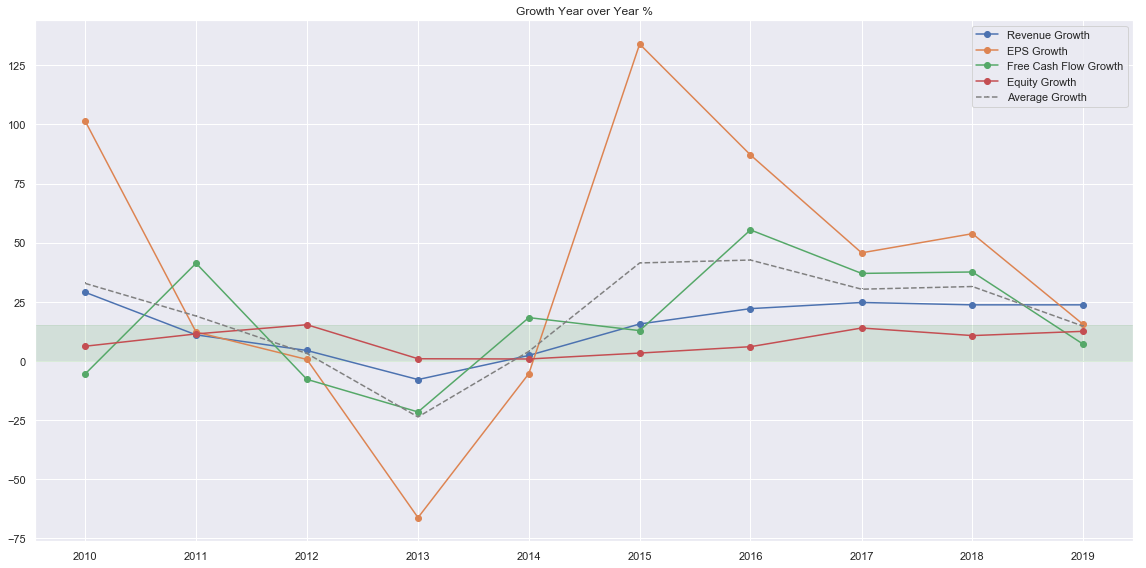

In [40]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

# print('All 4 growth rates should be >15%')

print(df[columns].mean(1).mean(0))

draw_chart(df, columns, title='Growth Year over Year %', mark_green_zone=(True, 15), draw_mean=True)

# Returns

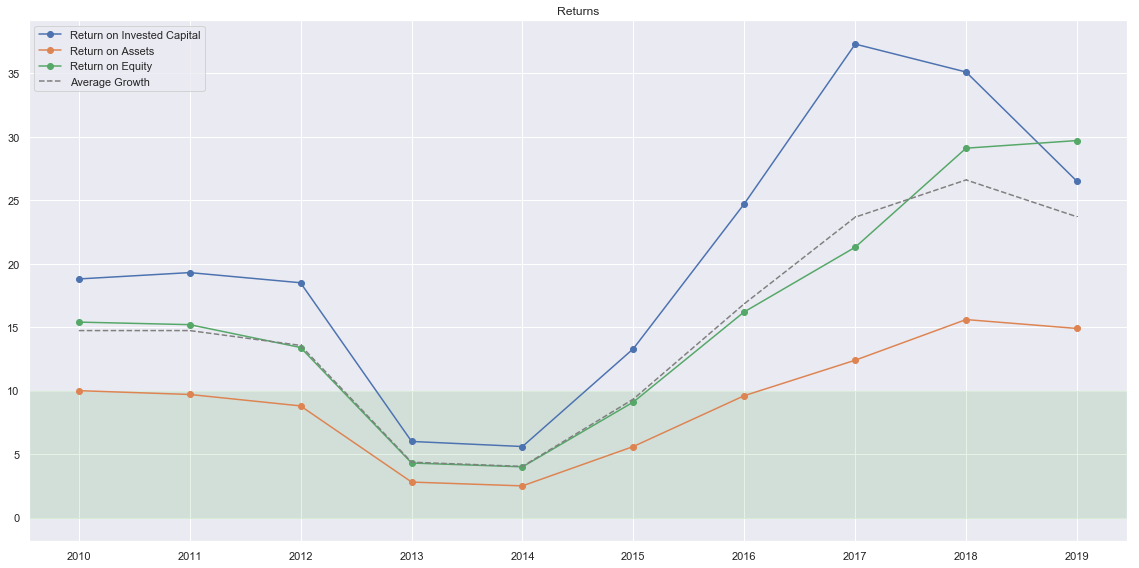

In [8]:
columns = ['Return on Invested Capital',
           'Return on Assets',
           'Return on Equity']

draw_chart(df, columns, title='Returns', mark_green_zone=(True, 10), draw_mean=True)

# ROIC: should be >10%
# ROE : should be +ve

# PE

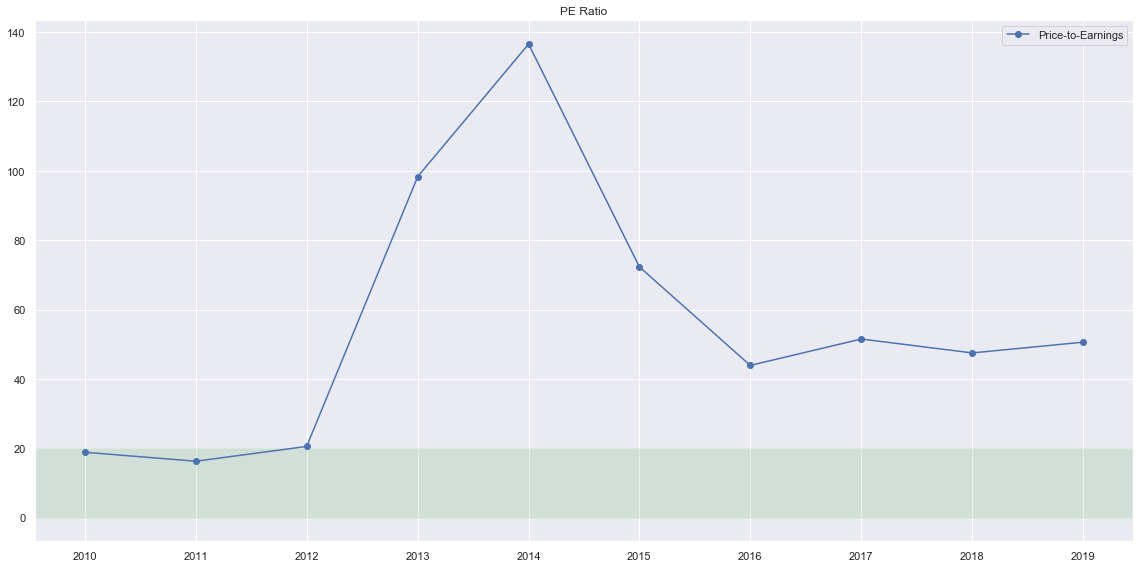

In [9]:
columns = ['Price-to-Earnings']

draw_chart(df, columns, title='PE Ratio', mark_green_zone=(True, 20))

# PE ratio: Lower is better. Compare with competators.
# EPS     : Should be +ve

# Market Cap

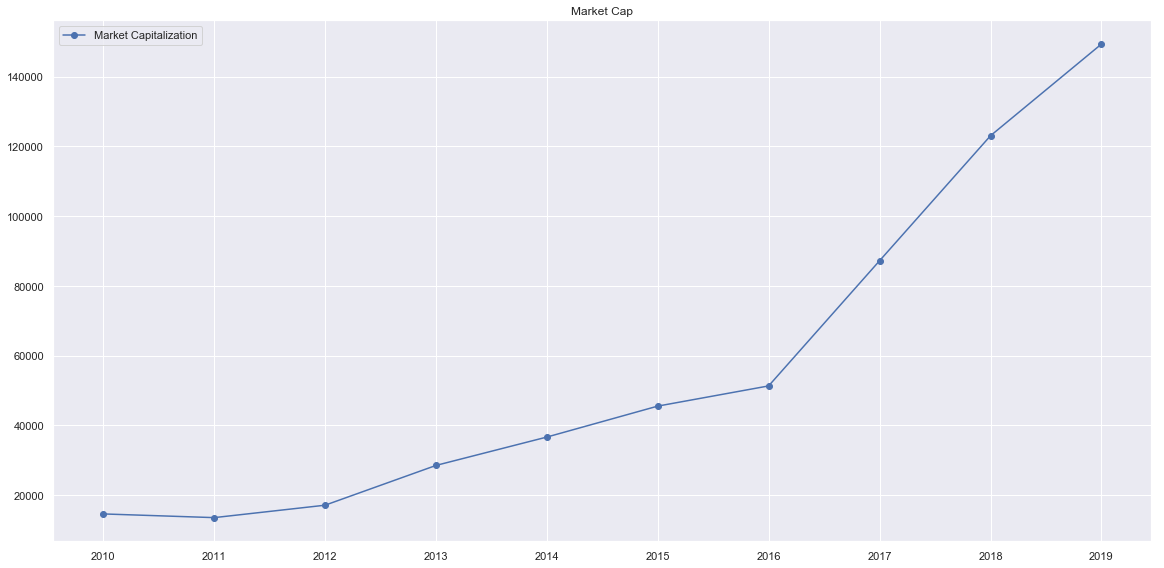

In [10]:
columns = ['Market Capitalization']
draw_chart(df, columns, title='Market Cap')

# Estimated Fair Value

    Est EPS  Est Fair Value  Est Fair Value (My Growth Rate)
1      6.01        352.4264                         352.4264
2      8.77        514.1200                         422.9100
3     12.79        750.0000                         507.4900
4     18.66       1094.1000                         608.9900
5     27.22       1596.0700                         730.7900
6     39.71       2328.3400                         876.9500
7     57.92       3396.5900                        1052.3400
8     84.50       4954.9400                        1262.8100
9    123.27       7228.2700                        1515.3700
10   179.82      10544.6000                        1818.4400


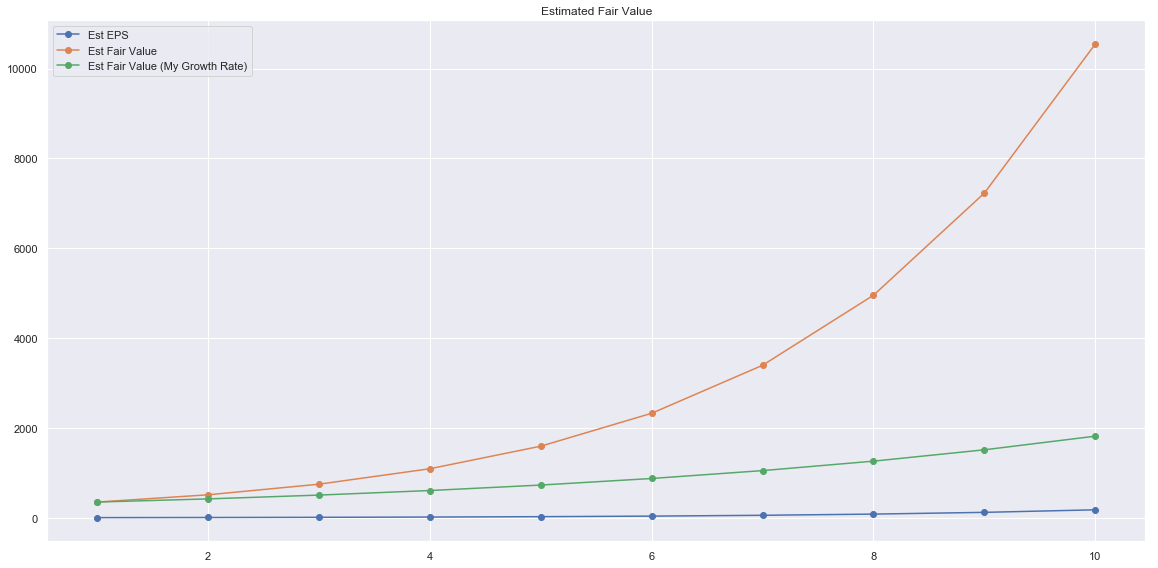

In [11]:
columns = ['Est EPS', 'Est Fair Value', 'Est Fair Value (My Growth Rate)']
print(estimated_price_df)
draw_chart(estimated_price_df, columns, title='Estimated Fair Value')

In [12]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']
df[columns].mean(1)[-1]

14.66

# Look at some numbers

In [34]:
# At buying point, current PE should be less than
# - historical average PE
# - 2x analysts 5y growth rate prediction {yahoo finance}
# - 2x historical equity growth rate      {}
# - 2x last years average growth rate (revenue, equity, fcf, eps)

columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

string_len = 33
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Historical avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('Historical Growth Rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Predicted Growth Rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Historical Equity Growth Rate', df['Equity Growth'].mean(), prec=string_len))
print('{:{prec}}: {}'.format('Last Years Avg Growth Rate', df[columns].mean(1)[-1], prec=string_len))

Current PE                       : 58.56

Historical avg PE                : 58.64
Historical Growth Rate           : 45.88
Predicted Growth Rate            : 19.25
Historical Equity Growth Rate    : 8.1
Last Years Avg Growth Rate       : 14.66


# Fair Value prediction

In [36]:
fv_historic_pe = round(eps_ttm * pe_ratio_5y_avg, 2)
fv_historic_growth = round(eps_ttm * (2*hist_5y_growth_rate), 2)
fv_analysts_prediction = round(eps_ttm * (2*pred_5y_growth_rate), 2)

string_len = 47
print('{:{prec}}: {}'.format('Fair Value (Morning Star)', fv_morning_star, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Avg PE (msn))', fv_historic_pe, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Growth (yahoo))', fv_historic_growth, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Analysts predicted Growth (yahoo))', fv_analysts_prediction, prec=string_len))

Fair Value (Morning Star)                      : 330
Fair Value (Historic Avg PE (msn))             : 352.43
Fair Value (Historic Growth (yahoo))           : 551.48
Fair Value (Analysts predicted Growth (yahoo)) : 231.38


# Verdict: Bye bellow 300